# Intervenciones web de psicología positiva

Como parte de tu trabajo en la división de salud mental de la OMS, te han encargado examinar la evidencia disponible acerca de intervenciones web breves para mejorar el bienestar y reducir la depresión. Durante tu revisión, un colega te compartió la siguiente referencia:

>Woodworth, R. J., O'Brien-Malone, A., Diamond, M. R., & Schüz, B. (2018). Data from, ‘Web-based Positive Psychology Interventions: A Reexamination of Effectiveness’. Journal of Open Psychology Data, 6(1), 1. DOI: http://doi.org/10.5334/jopd.35

El estudio en cuestión tiene resultados alentadores. Sin embargo, algo dentro de ti te dice que puede ser demasiado bueno para ser cierto. Decides escuchar tu intuición y revisas los datos para re-hacer el análisis y extraer tus propias conclusiones. 

Primero, cargas los datos y das un vistazo general.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.stats.multicomp import pairwise_tukeyhsd

df = pd.read_csv("ahi-cesd.csv")

In [3]:
df.head()

,id,occasion,elapsed.days,intervention,ahi01,ahi02,ahi03,ahi04,ahi05,ahi06,...,cesd13,cesd14,cesd15,cesd16,cesd17,cesd18,cesd19,cesd20,ahiTotal,cesdTotal
0,1,0,0.000000,4,2,3,2,3,3,2,...,2,3,1,2,1,1,2,2,63,14
1,1,1,11.772731,4,3,3,4,3,3,4,...,1,2,1,3,1,1,1,1,73,6
2,2,0,0.000000,1,3,4,3,4,2,3,...,1,1,1,4,1,1,1,1,73,7
3,2,1,8.017523,1,3,4,4,4,3,3,...,1,1,1,3,1,1,1,1,89,10
4,2,2,14.304086,1,3,4,4,4,3,3,...,3,1,1,1,1,1,1,1,89,13


# Antes y después

La base de datos tiene muchas variables. Para enfocar tu trabajo, decides fijarte únicamente en las siguientes variables:

- `ahiTotal` : Puntaje total del Authentic Happiness Inventory (AHI)
- `cesdTotal` : Puntaje total del Center for Epidemiological Studies Depression (CES-D) scale
- `occasion`: Momento de medición (0:Pretest, 1:Posttest, 2: Seguimiento a la 1era semana, 3: Seguimiento al 1er mes, 4: Seguimiento a los 3 meses, 5: Seguimiento a los 6 meses).
- `intervention`: Intervención recibida (1:Usar fortalezas distintivas, 2:Tres cosas buenas, 3:Visita de gratitud, 4:Registro de recuerdos tempranos -condición de control- )

## A partir de estas variables:

- Genera un DataFrame que solo contenga los datos de Pretest y Posttest.

In [4]:
ba = df[df["occasion"].isin([0, 1])]

- Genera una visualización que permita comparar los puntajes de la escala AHI según las intervenciones y los momentos de medición (pretest y posttest). ¿Observas alguna diferencia potencialmente significativa?

>Sugerencia: utiliza las funciones boxpot o violinplot del paquete seaborn.

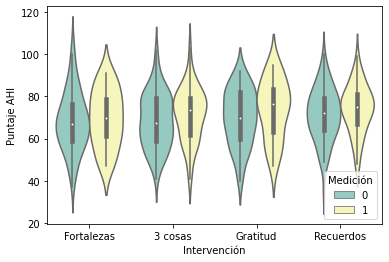

In [7]:
ax1 = sns.violinplot(
    x="intervention",
    y="ahiTotal",
    hue="occasion",
    data=ba,
    palette="Set3",
    scale="width",
)
ax1.set_xlabel("Intervención")
ax1.set_ylabel("Puntaje AHI")
ax1.legend(title="Medición")
intervenciones = ["Fortalezas", "3 cosas", "Gratitud", "Recuerdos"]
ax1.set_xticklabels(intervenciones);

- Genera una visualización que permita comparar los puntajes de la escala CES-D según las intervenciones y los momentos de medición (pretest y posttest). ¿Observas alguna diferencia potencialmente significativa?

>Sugerencia: utiliza las funciones boxpot o violinplot del paquete seaborn.

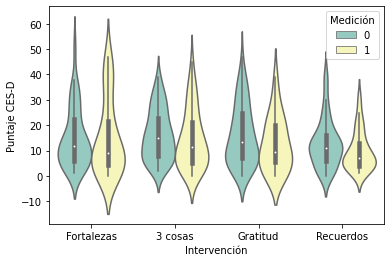

In [8]:
ax1 = sns.violinplot(
    x="intervention",
    y="cesdTotal",
    hue="occasion",
    data=ba,
    palette="Set3",
    scale="width",
)
ax1.set_xlabel("Intervención")
ax1.set_ylabel("Puntaje CES-D")
ax1.legend(title="Medición")
intervenciones = ["Fortalezas", "3 cosas", "Gratitud", "Recuerdos"]
ax1.set_xticklabels(intervenciones);

- Utiliza un ANOVA mixto (1 factor intrasujeto y 1 factor intersujeto) para examinar si existen efectos principales de las intervenciones (`Intervention`) y el momento de medición (`Occasion`) en los puntajes de la escala AHI (`ahiTotal`). ¿Qué puedes concluir?

>Sugerencia: Utiliza la función `mixedlm` disponible en el paquete [statsmodel](https://www.statsmodels.org/stable/mixed_linear.html). Puede que necesites leer un poco sobre el [lenguaje de fórmulas](https://patsy.readthedocs.io/en/latest/formulas.html) para aplicarla correctamente. 

In [9]:
mixed_ahi = smf.mixedlm(
    "ahiTotal ~ intervention*occasion", ba, groups=ba["id"]
).fit()
mixed_ahi.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
              Mixed Linear Model Regression Results
=================================================================
Model:               MixedLM    Dependent Variable:    ahiTotal  
No. Observations:    442        Method:                REML      
No. Groups:          295        Scale:                 29.7012   
Min. group size:     1          Log-Likelihood:        -1676.4362
Max. group size:     2          Converged:             Yes       
Mean group size:     1.5                                         
-----------------------------------------------------------------
                       Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------
Intercept              66.998    1.884 35.554 0.000 63.304 70.691
intervention            1.082    0.688  1.572 0.116 -0.267  2.432
occasion                3.302    1.552  2.128 0.033  0.261  6.344
intervention:occasion  -0.113    0.553 -0.205 0.838 -1.198  0.971
Group Var             142.709    4.403                           
=================================================================

"""

- Utiliza un ANOVA mixto (1 factor intrasujeto y 1 factor intersujeto) para examinar si existen efectos principales de las intervenciones (`Intervention`) y el momento de medición (`Occasion`) en los puntajes de la escala CES-D (`cesdTotal`). ¿Qué puedes concluir?

>Sugerencia: Utiliza la función `mixedlm` disponible en el paquete [statsmodel](https://www.statsmodels.org/stable/mixed_linear.html). Puede que necesites leer un poco sobre el [lenguaje de fórmulas](https://patsy.readthedocs.io/en/latest/formulas.html) para aplicarla correctamente. 

In [11]:
mixed_cesd = smf.mixedlm(
    "cesdTotal ~ intervention*occasion", ba, groups=ba["id"]
).fit()
print(mixed_cesd.summary())

             Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   cesdTotal 
No. Observations:     442       Method:               REML      
No. Groups:           295       Scale:                32.4806   
Min. group size:      1         Log-Likelihood:       -1624.4275
Max. group size:      2         Converged:            Yes       
Mean group size:      1.5                                       
----------------------------------------------------------------
                      Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------
Intercept             16.767    1.565 10.712 0.000 13.699 19.834
intervention          -0.681    0.572 -1.190 0.234 -1.801  0.440
occasion               0.235    1.600  0.147 0.883 -2.901  3.372
intervention:occasion -0.959    0.571 -1.680 0.093 -2.079  0.160
Group Var             86.466    2.771                           



# Follow-up

Ahora te propones trabajar con todas los momentos de medición para verificar si existe algún cambio en tus conclusiones preliminares. 

- Genera una visualización que permita comparar los puntajes de la escala AHI según las 4 intervenciones y los 6 momentos de medición. ¿Observas alguna diferencia potencialmente significativa?

>Sugerencia: Utiliza la función `lineplot` del paquete seaborn. 

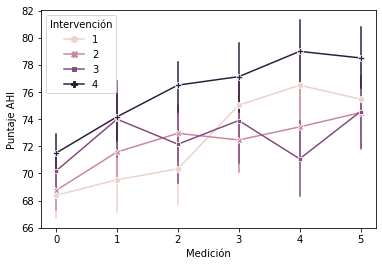

In [12]:
ax1 = sns.lineplot(
    x="occasion",
    y="ahiTotal",
    data=df,
    hue="intervention",
    style="intervention",
    markers=True,
    dashes=False,
    err_style="bars",
    ci=68,
)
ax1.set_xlabel("Medición")
ax1.set_ylabel("Puntaje AHI")
ax1.legend(title="Intervención");

- Genera una visualización que permita comparar los puntajes de la escala CES-D según las 4 intervenciones y los 6 momentos de medición. ¿Observas alguna diferencia potencialmente significativa?

>Sugerencia: Utiliza la función `lineplot` del paquete seaborn. 

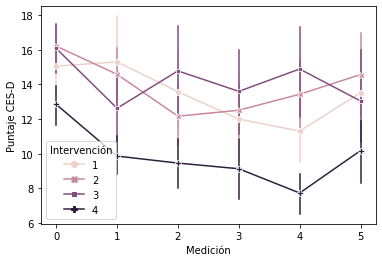

In [13]:
ax1 = sns.lineplot(
    x="occasion",
    y="cesdTotal",
    data=df,
    hue="intervention",
    style="intervention",
    markers=True,
    dashes=False,
    err_style="bars",
    ci=68,
)
ax1.set_xlabel("Medición")
ax1.set_ylabel("Puntaje CES-D")
ax1.legend(title="Intervención");

- Utiliza un ANOVA mixto 4x6 para examinar si existen efectos principales de las intervenciones (Intervention) y el momento de medición (Occasion) en los puntajes de la escala AHI (`ahiTotal`). ¿Qué puedes concluir?


In [14]:
full_mixed_ahi = smf.mixedlm(
    "ahiTotal ~ intervention*occasion", df, groups=df["id"]
).fit()
print(full_mixed_ahi.summary())

              Mixed Linear Model Regression Results
Model:               MixedLM    Dependent Variable:    ahiTotal  
No. Observations:    992        Method:                REML      
No. Groups:          295        Scale:                 44.8687   
Min. group size:     1          Log-Likelihood:        -3630.4344
Max. group size:     6          Converged:             Yes       
Mean group size:     3.4                                         
-----------------------------------------------------------------
                       Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------
Intercept              67.489    1.919 35.166 0.000 63.727 71.250
intervention            1.138    0.701  1.625 0.104 -0.235  2.511
occasion                1.305    0.331  3.942 0.000  0.656  1.954
intervention:occasion  -0.108    0.121 -0.891 0.373 -0.346  0.130
Group Var             145.936    2.408                           



- De ser pertinente, realiza el cálculo de comparaciones múltiples con la prueba de Tukey. ¿Qué puedes concluir?
> Sugerencia: utiliza la función `pairwise_tukeyhsd` del paquete stats.model

In [15]:
mc = pairwise_tukeyhsd(df["ahiTotal"], df["occasion"])
mc_results = mc.summary()
print(mc_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   2.6487 0.4252 -1.4019  6.6992  False
     0      2   3.3395 0.1551  -0.624   7.303  False
     0      3   4.8489 0.0107  0.7213  8.9765   True
     0      4   5.4889 0.0026  1.3093  9.6686   True
     0      5   6.1282  0.001  1.7842 10.4723   True
     1      2   0.6908    0.9 -3.9138  5.2955  False
     1      3   2.2002 0.7445 -2.5464  6.9469  False
     1      4   2.8403 0.5318 -1.9517  7.6323  False
     1      5   3.4796 0.3357 -1.4564  8.4156  False
     2      3   1.5094    0.9 -3.1632   6.182  False
     2      4   2.1494 0.7577 -2.5692  6.8681  False
     2      5   2.7887 0.5639 -2.0761  7.6536  False
     3      4   0.6401    0.9 -4.2172  5.4974  False
     3      5   1.2794    0.9 -3.7201  6.2788  False
     4      5   0.6393    0.9 -4.4032  5.6818  False
----------------------------------------------

- Utiliza un ANOVA mixto 4x6 para examinar si existen efectos principales de las intervenciones (Intervention) y el momento de medición (Occasion) en los puntajes de la escala CES-D (`cesdTotal`). ¿Qué puedes concluir?

In [16]:
full_mixed_cesd = smf.mixedlm(
    "cesdTotal ~ intervention*occasion", df, groups=df["id"]
).fit()
print(full_mixed_cesd.summary())

             Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   cesdTotal 
No. Observations:     992       Method:               REML      
No. Groups:           295       Scale:                42.4106   
Min. group size:      1         Log-Likelihood:       -3543.7207
Max. group size:      6         Converged:            Yes       
Mean group size:      3.4                                       
----------------------------------------------------------------
                      Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------
Intercept             16.484    1.551 10.631 0.000 13.445 19.523
intervention          -0.852    0.566 -1.505 0.132 -1.961  0.257
occasion              -0.528    0.319 -1.655 0.098 -1.153  0.097
intervention:occasion  0.010    0.117  0.082 0.935 -0.219  0.239
Group Var             85.819    1.533                           

